# Part 2 - Mapping Yelp Search Results

## Obective

- For this CodeAlong, we will be working with the Yelp API results from last class. 
- You will load in the .csv.gz of your yelp results and prepare the data for visualization.
- You will use Plotly Express to create an interactive map with all of the results.

## Tools You Will Use
- Part 1:
    - Yelp API:
        - Getting Started: 
            - https://www.yelp.com/developers/documentation/v3/get_started

    - `YelpAPI` python package
        -  "YelpAPI": https://github.com/gfairchild/yelpapi
- Part 2:

    - Plotly Express: https://plotly.com/python/getting-started/
        - With Mapbox API: https://www.mapbox.com/
        - `px.scatter_mapbox` [Documentation](https://plotly.com/python/scattermapbox/): 




### Applying Code From
- [Advanced Transformations with Pandas - Part 1](https://login.codingdojo.com/m/376/12529/88086)
- [Advanced Transformations with Pandas - Part 2](https://login.codingdojo.com/m/376/12529/88088)

### Goal

- We want to create a map with every restaurant plotted as a scatter plot with detailed information that appears when we hover over a business
- We will use plotly express's `px.scatter_mapbox` function to accomplish this.
    - https://plotly.com/python/scattermapbox/
    
    - Some of the options require a Mapbox API token:
    - However, we will be using the options that DO NOT require a token.
        - https://studio.mapbox.com/
    

# Loading Data from Part 1

In [34]:
## Plotly is not included in your dojo-env
!pip install plotly

In [35]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

## importing plotly 
import plotly.express as px

In [36]:
## Load in csv.gz
df = pd.read_csv('Data/Atlanta-mexican.csv.gz')
df.head()

id                                     alias  \
0  9HjUwnEL5WIlv7RnnzF7CQ                taqueria-el-vecino-decatur   
1  GfSQJ3Ex7IjomEAav9Mwzw  la-parrilla-mexican-restaurant-atlanta-2   
2  HKZ0dUt9sUUZVYlzwjX0ig              los-ninos-taqueria-decatur-2   
3  V86AJK3xytBv2C0bwi9_Ow                     la-pastorcita-atlanta   
4  QN4FMM1-J4Me5hu-ro85EA               taqueria-la-carreta-atlanta   

                             name  \
0              Taqueria El Vecino   
1  La Parrilla Mexican Restaurant   
2              Los Ninos Taqueria   
3                   La Pastorcita   
4             Taqueria La Carreta   

                                           image_url  is_closed  \
0  https://s3-media3.fl.yelpcdn.com/bphoto/_QwrEm...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/xDfJMt...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/pphWgJ...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/QwqXsI...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/8sFvhY...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/taqueria-el-vecino-de...           272   
1  https://www.yelp.com/biz/la-parrilla-mexican-r...           437   
2  https://www.yelp.com/biz/los-ninos-taqueria-de...            75   
3  https://www.yelp.com/biz/la-pastorcita-atlanta...           505   
4  https://www.yelp.com/biz/taqueria-la-carreta-a...            60   

                                          categories  rating  \
0  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     3.8   
1         [{'alias': 'mexican', 'title': 'Mexican'}]     3.7   
2         [{'alias': 'mexican', 'title': 'Mexican'}]     4.5   
3         [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.3   

                                         coordinates            transactions  \
0  {'latitude': 33.8239171, 'longitude': -84.2939...  ['delivery', 'pickup']   
1  {'latitude': 33.8147766440452, 'longitude': -8...            ['delivery']   
2  {'latitude': 33.7709975, 'longitude': -84.2922...                      []   
3     {'latitude': 33.84308, 'longitude': -84.32924}  ['delivery', 'pickup']   
4  {'latitude': 33.8424612046155, 'longitude': -8...            ['delivery']   

  price                                           location         phone  \
0    $$  {'address1': '2743 Lavista Rd', 'address2': ''...  1.404929e+10   
1    $$  {'address1': '2945 North Druid Hills Rd', 'add...  1.678403e+10   
2     $  {'address1': '307 E College Ave B', 'address2'...           NaN   
3     $  {'address1': '3304 Buford Hwy NE', 'address2':...  1.678706e+10   
4    $$  {'address1': '3375 Buford Hwy NE', 'address2':...  1.678777e+10   

    display_phone     distance  
0  (404) 929-0301  1361.563323  
1  (678) 403-3831  2198.475924  
2             NaN  4704.697534  
3  (678) 705-8162  5117.990718  
4  (678) 777-1447  4914.941348

## Required Preprocessing 

- 1. We need to get the latitude and longitude for each business as separate columns.
- 2. We also want to be able to show the restaurants:
    - name
    - price
    - type of transactions (pickup/delivery)
    - address

### Separating Latitude and Longitude

In [37]:
# Preview the coordinates column
df['coordinates'].head()

0    {'latitude': 33.8239171, 'longitude': -84.2939...
1    {'latitude': 33.8147766440452, 'longitude': -8...
2    {'latitude': 33.7709975, 'longitude': -84.2922...
3       {'latitude': 33.84308, 'longitude': -84.32924}
4    {'latitude': 33.8424612046155, 'longitude': -8...
Name: coordinates, dtype: object

In [38]:
# it LOOKS like a dictionary which means we could use pd.Series to convert the dictionary into a series, one for latitude and one for longitude
# In the next cell, we will try to do this, but it will not work (yet)!

## use .apply pd.Series to convert a dict to columns
df['coordinates'].apply(pd.Series)

0
0    {'latitude': 33.8239171, 'longitude': -84.2939...
1    {'latitude': 33.8147766440452, 'longitude': -8...
2    {'latitude': 33.7709975, 'longitude': -84.2922...
3       {'latitude': 33.84308, 'longitude': -84.32924}
4    {'latitude': 33.8424612046155, 'longitude': -8...
..                                                 ...
480  {'latitude': 33.7725922839239, 'longitude': -8...
481  {'latitude': 33.7589598122, 'longitude': -84.3...
482  {'latitude': 33.7593506946192, 'longitude': -8...
483   {'latitude': 33.882374, 'longitude': -84.220146}
484     {'latitude': 33.84474, 'longitude': -84.37123}

[485 rows x 1 columns]

- Why didn't that work???

In [39]:
## slice out a single test coordinate
test_coord = df['coordinates'][0]
test_coord

"{'latitude': 33.8239171, 'longitude': -84.2939897}"

In [40]:
# What is the datatype?
type(test_coord)

str

- Its not a dictionary anymore!!! What??
    - CSV files cant store iterables (lists, dictionaries) so they get converted to strings.

### Fixing the String-Dictionaries

- The json module has another version of load and dump called `json.loads` and `json.dumps`
    - These are designed to process STRINGS instead of files. (that is what the "s" means...read it as load s or dump s)
    
- If we use `json.loads` we can convert our `string dictionary` into an `actual dictionary`. 

In [41]:
## Use json.loads on the test coordinate
json.loads(test_coord)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

### JSON requires double quotes!
We got a `JSON Decode Error` because JSON was `expecting double quotes` inside
of the dictionary

### We are now going to use the .replace( ) function to replace single ' with double "

In [ ]:
## replace single ' with double " 
test_coord = test_coord.replace("'",  '"')
test_coord

In [ ]:
## Use json.loads on the test coordinate, again
json.loads(test_coord)

In [ ]:
# viewing type after using json.loads
type(json.loads(test_coord))

### Now, how can we apply this same process to the entire column??

In [ ]:
## replace ' with " (entire column)
df['coordinates'] = df['coordinates'].str.replace("'", '"')
## apply json.loads
df['coordinates'] = df['coordinates'].apply(json.loads)

In [ ]:
## slice out a single test coordinate
test = df['coordinates'][5]
test

In [ ]:
# Check the data type of the test coordinate
type(test)

### Using .apply with pd.Series to convert a dictionary column into multiple columns
This is the process of unpacking the dictionary to columns

In [ ]:
## use .apply pd.Series to convert a dict to columns
separated = df['coordinates'].apply(pd.Series)
separated

In [43]:
## Concatenate the 2 new columns and drop the original.
df = pd.concat([df, separated], axis =1)
df = df.drop(columns = 'coordinates')
df.head()

id                                     alias  \
0  9HjUwnEL5WIlv7RnnzF7CQ                taqueria-el-vecino-decatur   
1  GfSQJ3Ex7IjomEAav9Mwzw  la-parrilla-mexican-restaurant-atlanta-2   
2  HKZ0dUt9sUUZVYlzwjX0ig              los-ninos-taqueria-decatur-2   
3  V86AJK3xytBv2C0bwi9_Ow                     la-pastorcita-atlanta   
4  QN4FMM1-J4Me5hu-ro85EA               taqueria-la-carreta-atlanta   

                             name  \
0              Taqueria El Vecino   
1  La Parrilla Mexican Restaurant   
2              Los Ninos Taqueria   
3                   La Pastorcita   
4             Taqueria La Carreta   

                                           image_url  is_closed  \
0  https://s3-media3.fl.yelpcdn.com/bphoto/_QwrEm...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/xDfJMt...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/pphWgJ...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/QwqXsI...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/8sFvhY...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/taqueria-el-vecino-de...           272   
1  https://www.yelp.com/biz/la-parrilla-mexican-r...           437   
2  https://www.yelp.com/biz/los-ninos-taqueria-de...            75   
3  https://www.yelp.com/biz/la-pastorcita-atlanta...           505   
4  https://www.yelp.com/biz/taqueria-la-carreta-a...            60   

                                          categories  rating  \
0  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     3.8   
1         [{'alias': 'mexican', 'title': 'Mexican'}]     3.7   
2         [{'alias': 'mexican', 'title': 'Mexican'}]     4.5   
3         [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.3   

             transactions price  \
0  ['delivery', 'pickup']    $$   
1            ['delivery']    $$   
2                      []     $   
3  ['delivery', 'pickup']     $   
4            ['delivery']    $$   

                                            location         phone  \
0  {'address1': '2743 Lavista Rd', 'address2': ''...  1.404929e+10   
1  {'address1': '2945 North Druid Hills Rd', 'add...  1.678403e+10   
2  {'address1': '307 E College Ave B', 'address2'...           NaN   
3  {'address1': '3304 Buford Hwy NE', 'address2':...  1.678706e+10   
4  {'address1': '3375 Buford Hwy NE', 'address2':...  1.678777e+10   

    display_phone     distance   latitude  longitude  
0  (404) 929-0301  1361.563323  33.823917 -84.293990  
1  (678) 403-3831  2198.475924  33.814777 -84.310819  
2             NaN  4704.697534  33.770998 -84.292289  
3  (678) 705-8162  5117.990718  33.843080 -84.329240  
4  (678) 777-1447  4914.941348  33.842461 -84.326870

## Creating a Simple Map

- Use the plotly express `scatter_mapbox` function

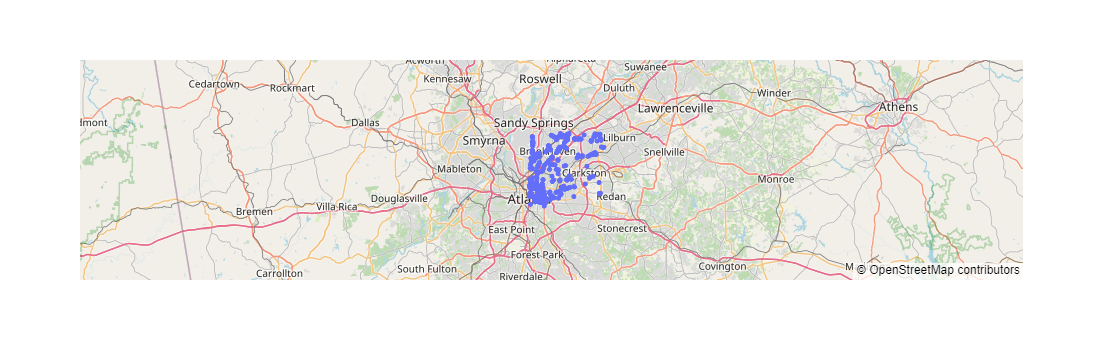

In [44]:
## use scatter_mapbox to create a first attempt at our map

px.scatter_mapbox(df, lat='latitude',lon='longitude', mapbox_style='open-street-map')

### Adding Hover Data

- We want to show the restaurants:
    - name
    - price range
    - rating
    - transaction type (delivery/takeout)
    - address
    
    
- We can use the `hover_name` and `hover_data` arguments for `px.scatter_mapbox` to add this info!

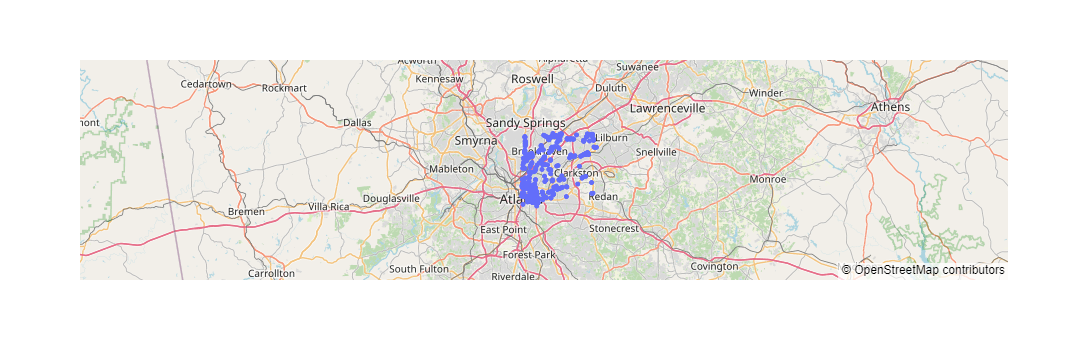

In [45]:
## add hover_name (name) and hover_data for price,rating,location and take a look 

px.scatter_mapbox(df, lat='latitude',lon='longitude',
                  mapbox_style='open-street-map', hover_name='name',
                 hover_data=['price','rating','location'])

### Fixing the Location Column

In [46]:
## slice out a test address
test_loc = df['location'][0]
test_loc

"{'address1': '2743 Lavista Rd', 'address2': '', 'address3': '', 'city': 'Decatur', 'zip_code': '30033', 'country': 'US', 'state': 'GA', 'display_address': ['2743 Lavista Rd', 'Decatur, GA 30033']}"

In [47]:
# Check data type
type(test_loc)

str

> Also a string-dictionary...

In [48]:
## replace ' with "
df['location'] = df['location'].str.replace("'", '"')
df.head()

id                                     alias  \
0  9HjUwnEL5WIlv7RnnzF7CQ                taqueria-el-vecino-decatur   
1  GfSQJ3Ex7IjomEAav9Mwzw  la-parrilla-mexican-restaurant-atlanta-2   
2  HKZ0dUt9sUUZVYlzwjX0ig              los-ninos-taqueria-decatur-2   
3  V86AJK3xytBv2C0bwi9_Ow                     la-pastorcita-atlanta   
4  QN4FMM1-J4Me5hu-ro85EA               taqueria-la-carreta-atlanta   

                             name  \
0              Taqueria El Vecino   
1  La Parrilla Mexican Restaurant   
2              Los Ninos Taqueria   
3                   La Pastorcita   
4             Taqueria La Carreta   

                                           image_url  is_closed  \
0  https://s3-media3.fl.yelpcdn.com/bphoto/_QwrEm...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/xDfJMt...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/pphWgJ...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/QwqXsI...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/8sFvhY...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/taqueria-el-vecino-de...           272   
1  https://www.yelp.com/biz/la-parrilla-mexican-r...           437   
2  https://www.yelp.com/biz/los-ninos-taqueria-de...            75   
3  https://www.yelp.com/biz/la-pastorcita-atlanta...           505   
4  https://www.yelp.com/biz/taqueria-la-carreta-a...            60   

                                          categories  rating  \
0  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     3.8   
1         [{'alias': 'mexican', 'title': 'Mexican'}]     3.7   
2         [{'alias': 'mexican', 'title': 'Mexican'}]     4.5   
3         [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.3   

             transactions price  \
0  ['delivery', 'pickup']    $$   
1            ['delivery']    $$   
2                      []     $   
3  ['delivery', 'pickup']     $   
4            ['delivery']    $$   

                                            location         phone  \
0  {"address1": "2743 Lavista Rd", "address2": ""...  1.404929e+10   
1  {"address1": "2945 North Druid Hills Rd", "add...  1.678403e+10   
2  {"address1": "307 E College Ave B", "address2"...           NaN   
3  {"address1": "3304 Buford Hwy NE", "address2":...  1.678706e+10   
4  {"address1": "3375 Buford Hwy NE", "address2":...  1.678777e+10   

    display_phone     distance   latitude  longitude  
0  (404) 929-0301  1361.563323  33.823917 -84.293990  
1  (678) 403-3831  2198.475924  33.814777 -84.310819  
2             NaN  4704.697534  33.770998 -84.292289  
3  (678) 705-8162  5117.990718  33.843080 -84.329240  
4  (678) 777-1447  4914.941348  33.842461 -84.326870

In [49]:
## apply json.loads
df['location'] = df['location'].apply(json.loads)
df.head()

JSONDecodeError: Expecting value: line 1 column 70 (char 69)

# > Ruh roh....

- Hmm, let's slice out a test_address again and let's write a function to accomplish this instead.
    - We can use try and except in our function to get around the errors.

### Fixing Addresses - with a custom function


In [50]:
## slice out test address 
test_addr = df.loc[0, 'location']
test_addr

'{"address1": "2743 Lavista Rd", "address2": "", "address3": "", "city": "Decatur", "zip_code": "30033", "country": "US", "state": "GA", "display_address": ["2743 Lavista Rd", "Decatur, GA 30033"]}'

In [51]:
## write a function to just run json.loads on the address
def fix_address(test_addr):
    try:
        return json.loads(test_addr)
    except:
        return "ERROR"

In [52]:
## test applying our function
df['location'].apply(fix_address)

0      {'address1': '2743 Lavista Rd', 'address2': ''...
1      {'address1': '2945 North Druid Hills Rd', 'add...
2                                                  ERROR
3      {'address1': '3304 Buford Hwy NE', 'address2':...
4      {'address1': '3375 Buford Hwy NE', 'address2':...
                             ...                        
480                                                ERROR
481    {'address1': '1220 Caroline St NE', 'address2'...
482                                                ERROR
483    {'address1': '3180 Norcross Tkr Rd', 'address2...
484    {'address1': '3280 Peachtree Rd NE', 'address2...
Name: location, Length: 485, dtype: object

- It worked! Now let's save this as a new column (display_location),
and then let's investigate the businesses that had an "ERROR".

In [53]:
### save a new display_location column using our function
df['display_location'] = df['location'].apply(fix_address)

In [54]:
## filter for businesses with display_location == "ERROR"
errors = df[df['display_location'] == 'ERROR']
errors

id  \
2    HKZ0dUt9sUUZVYlzwjX0ig   
7    _FYMOrNo9HjdFo2Kg4Ao4w   
10   PQBCfIUpCbRr9TltCeQ6iA   
14   Ta3A0pqMB8Va3Vz_dGwjyg   
15   YiqzdP2y5CMSP4N3y48sqA   
..                      ...   
465  UQ0gqyDzvIMbCKpwxQJxOg   
469  u1DbsZ7oz1v9R1zrcodAUA   
470  dKHlfuU5J_A8WpUIa44vQA   
480  53_W0xLHYcYpOdivbxFINQ   
482  dTqLaBbjDRIYKqEQ9L3J8w   

                                                 alias  \
2                         los-ninos-taqueria-decatur-2   
7                                 la-chiquiada-decatur   
10           santo-cantina-and-cocina-avondale-estates   
14                  mela-restaurant-and-lounge-decatur   
15                        taqueria-los-hermanos-tucker   
..                                                 ...   
465                  chopt-creative-salad-co-atlanta-6   
469                             yuniques-tacos-atlanta   
470  hobnob-neighborhood-tavern-town-brookhaven-bro...   
480                                  bar-vegan-atlanta   
482                           mojo-pizza-n-pub-decatur   

                           name  \
2            Los Ninos Taqueria   
7                  La Chiquiada   
10       Santo Cantina & Cocina   
14     Mela Restaurant & Lounge   
15        Taqueria Los Hermanos   
..                          ...   
465    Chopt Creative Salad Co.   
469              Yuniques Tacos   
470  HOBNOB Neighborhood Tavern   
480                   Bar Vegan   
482           Mojo Pizza N' Pub   

                                             image_url  is_closed  \
2    https://s3-media2.fl.yelpcdn.com/bphoto/pphWgJ...      False   
7    https://s3-media3.fl.yelpcdn.com/bphoto/tLFi9P...      False   
10   https://s3-media1.fl.yelpcdn.com/bphoto/5931JI...      False   
14   https://s3-media2.fl.yelpcdn.com/bphoto/u0_fvs...      False   
15   https://s3-media1.fl.yelpcdn.com/bphoto/VE0PGF...      False   
..                                                 ...        ...   
465  https://s3-media1.fl.yelpcdn.com/bphoto/kAAYNY...      False   
469  https://s3-media1.fl.yelpcdn.com/bphoto/HFGORB...      False   
470  https://s3-media4.fl.yelpcdn.com/bphoto/w_G5-R...      False   
480  https://s3-media3.fl.yelpcdn.com/bphoto/-iBEss...      False   
482  https://s3-media2.fl.yelpcdn.com/bphoto/kNEdDj...      False   

                                                   url  review_count  \
2    https://www.yelp.com/biz/los-ninos-taqueria-de...            75   
7    https://www.yelp.com/biz/la-chiquiada-decatur?...            63   
10   https://www.yelp.com/biz/santo-cantina-and-coc...            95   
14   https://www.yelp.com/biz/mela-restaurant-and-l...            52   
15   https://www.yelp.com/biz/taqueria-los-hermanos...           377   
..                                                 ...           ...   
465  https://www.yelp.com/biz/chopt-creative-salad-...           116   
469  https://www.yelp.com/biz/yuniques-tacos-atlant...             1   
470  https://www.yelp.com/biz/hobnob-neighborhood-t...           487   
480  https://www.yelp.com/biz/bar-vegan-atlanta?adj...           498   
482  https://www.yelp.com/biz/mojo-pizza-n-pub-deca...           177   

                                            categories  rating  \
2           [{'alias': 'mexican', 'title': 'Mexican'}]     4.5   
7    [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.2   
10          [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
14   [{'alias': 'hookah_bars', 'title': 'Hookah Bar...     4.3   
15          [{'alias': 'mexican', 'title': 'Mexican'}]     4.2   
..                                                 ...     ...   
465  [{'alias': 'salad', 'title': 'Salad'}, {'alias...     3.4   
469  [{'alias': 'foodtrucks', 'title': 'Food Trucks...     1.0   
470  [{'alias': 'bars', 'title': 'Bars'}, {'alias':...     3.6   
480               [{'alias': 'bars', 'title': 'Bars'}]     3.8   
482  [{'alias': 'pizza', 'title': 'Pizza'}, {'alias...     2.8   

               transactions price  \
2         

In [55]:
## slice out a new test address and inspect
test_addr = df.loc[437, 'location']
test_addr

'{"address1": "627 E College Ave", "address2": None, "address3": None, "city": "Decatur", "zip_code": "30030", "country": "US", "state": "GA", "display_address": ["627 E College Ave", "Decatur, GA 30030"]}'

> After some more investigation, we would find a few issues with these "ERROR" rows.
1. They contained None.
2. They contained an apostrophe in the name.
3. ...?

### Possible Fixes (if we care to/have the time)


- Use Regular Expressions to find an fix the display addresses with " ' " in them
- Use string split to split on the word display address.
    - Then use string methods to clean up

### Moving Forward without those rows (for now)

In [56]:
## remove any rows where display_location == 'ERROR'
df = df.loc[df['display_location'] != 'ERROR']
df.head()

id                                     alias  \
0  9HjUwnEL5WIlv7RnnzF7CQ                taqueria-el-vecino-decatur   
1  GfSQJ3Ex7IjomEAav9Mwzw  la-parrilla-mexican-restaurant-atlanta-2   
3  V86AJK3xytBv2C0bwi9_Ow                     la-pastorcita-atlanta   
4  QN4FMM1-J4Me5hu-ro85EA               taqueria-la-carreta-atlanta   
5  2uiFavCGvjlqDSkl1cIZPw                   el-rey-del-taco-atlanta   

                             name  \
0              Taqueria El Vecino   
1  La Parrilla Mexican Restaurant   
3                   La Pastorcita   
4             Taqueria La Carreta   
5                 El Rey del Taco   

                                           image_url  is_closed  \
0  https://s3-media3.fl.yelpcdn.com/bphoto/_QwrEm...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/xDfJMt...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/QwqXsI...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/8sFvhY...      False   
5  https://s3-media1.fl.yelpcdn.com/bphoto/RP9V7q...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/taqueria-el-vecino-de...           272   
1  https://www.yelp.com/biz/la-parrilla-mexican-r...           437   
3  https://www.yelp.com/biz/la-pastorcita-atlanta...           505   
4  https://www.yelp.com/biz/taqueria-la-carreta-a...            60   
5  https://www.yelp.com/biz/el-rey-del-taco-atlan...          1078   

                                          categories  rating  \
0  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     3.8   
1         [{'alias': 'mexican', 'title': 'Mexican'}]     3.7   
3         [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.3   
5  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.0   

             transactions price  \
0  ['delivery', 'pickup']    $$   
1            ['delivery']    $$   
3  ['delivery', 'pickup']     $   
4            ['delivery']    $$   
5            ['delivery']    $$   

                                            location         phone  \
0  {"address1": "2743 Lavista Rd", "address2": ""...  1.404929e+10   
1  {"address1": "2945 North Druid Hills Rd", "add...  1.678403e+10   
3  {"address1": "3304 Buford Hwy NE", "address2":...  1.678706e+10   
4  {"address1": "3375 Buford Hwy NE", "address2":...  1.678777e+10   
5  {"address1": "5288 Buford Hwy NE", "address2":...  1.770986e+10   

    display_phone     distance   latitude  longitude  \
0  (404) 929-0301  1361.563323  33.823917 -84.293990   
1  (678) 403-3831  2198.475924  33.814777 -84.310819   
3  (678) 705-8162  5117.990718  33.843080 -84.329240   
4  (678) 777-1447  4914.941348  33.842461 -84.326870   
5  (770) 986-0032  9347.910866  33.897046 -84.281919   

                                    display_location  
0  {'address1': '2743 Lavista Rd', 'address2': ''...  
1  {'address1': '2945 North Druid Hills Rd', 'add...  
3  {'address1': '3304 Buford Hwy NE', 'address2':...  
4  {'address1': '3375 Buford Hwy NE', 'address2':...  
5  {'address1': '5288 Buford Hwy NE', 'address2':...

- We want the "display_address" key from the "display_location" dictionaries.
- We could use a .apply and a lamda to slice out the desired key.

In [61]:
## slice out a new test address and inspect
test_addr = df.loc[0, 'display_location']
test_addr

{'address1': '2743 Lavista Rd',
 'address2': '',
 'address3': '',
 'city': 'Decatur',
 'zip_code': '30033',
 'country': 'US',
 'state': 'GA',
 'display_address': ['2743 Lavista Rd', 'Decatur, GA 30033']}

In [ ]:
## use apply and lambda to slice correct key

- Almost done! We want to convert display_address to a string instead of a list of strings.
- We can use the string method .join to do so!

In [62]:
## slice out the display address from the test address
test_addr['display_address']

['2743 Lavista Rd', 'Decatur, GA 30033']

In [63]:
## test using .join with a "\n"
'\n'.join(test_addr['display_address'])

'2743 Lavista Rd\nDecatur, GA 30033'

In [67]:
## use apply and Lambda to slice correct key
df['display_address'] = df['display_location'].apply(lambda x: x['display_address'])
df.head()

id                                     alias  \
0  9HjUwnEL5WIlv7RnnzF7CQ                taqueria-el-vecino-decatur   
1  GfSQJ3Ex7IjomEAav9Mwzw  la-parrilla-mexican-restaurant-atlanta-2   
3  V86AJK3xytBv2C0bwi9_Ow                     la-pastorcita-atlanta   
4  QN4FMM1-J4Me5hu-ro85EA               taqueria-la-carreta-atlanta   
5  2uiFavCGvjlqDSkl1cIZPw                   el-rey-del-taco-atlanta   

                             name  \
0              Taqueria El Vecino   
1  La Parrilla Mexican Restaurant   
3                   La Pastorcita   
4             Taqueria La Carreta   
5                 El Rey del Taco   

                                           image_url  is_closed  \
0  https://s3-media3.fl.yelpcdn.com/bphoto/_QwrEm...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/xDfJMt...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/QwqXsI...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/8sFvhY...      False   
5  https://s3-media1.fl.yelpcdn.com/bphoto/RP9V7q...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/taqueria-el-vecino-de...           272   
1  https://www.yelp.com/biz/la-parrilla-mexican-r...           437   
3  https://www.yelp.com/biz/la-pastorcita-atlanta...           505   
4  https://www.yelp.com/biz/taqueria-la-carreta-a...            60   
5  https://www.yelp.com/biz/el-rey-del-taco-atlan...          1078   

                                          categories  rating  \
0  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     3.8   
1         [{'alias': 'mexican', 'title': 'Mexican'}]     3.7   
3         [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.3   
5  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.0   

             transactions price  \
0  ['delivery', 'pickup']    $$   
1            ['delivery']    $$   
3  ['delivery', 'pickup']     $   
4            ['delivery']    $$   
5            ['delivery']    $$   

                                            location         phone  \
0  {"address1": "2743 Lavista Rd", "address2": ""...  1.404929e+10   
1  {"address1": "2945 North Druid Hills Rd", "add...  1.678403e+10   
3  {"address1": "3304 Buford Hwy NE", "address2":...  1.678706e+10   
4  {"address1": "3375 Buford Hwy NE", "address2":...  1.678777e+10   
5  {"address1": "5288 Buford Hwy NE", "address2":...  1.770986e+10   

    display_phone     distance   latitude  longitude  \
0  (404) 929-0301  1361.563323  33.823917 -84.293990   
1  (678) 403-3831  2198.475924  33.814777 -84.310819   
3  (678) 705-8162  5117.990718  33.843080 -84.329240   
4  (678) 777-1447  4914.941348  33.842461 -84.326870   
5  (770) 986-0032  9347.910866  33.897046 -84.281919   

                                    display_location  \
0  {'address1': '2743 Lavista Rd', 'address2': ''...   
1  {'address1': '2945 North Druid Hills Rd', 'add...   
3  {'address1': '3304 Buford Hwy NE', 'address2':...   
4  {'address1': '3375 Buford Hwy NE', 'address2':...   
5  {'address1': '5288 Buford Hwy NE', 'address2':...   

                                     display_address  
0               [2743 Lavista Rd, Decatur, GA 30033]  
1     [2945 North Druid Hills Rd, Atlanta, GA 30329]  
3            [3304 Buford Hwy NE, Atlanta, GA 30329]  
4  [3375 Buford Hwy NE, Ste 1120, Atlanta, GA 30329]  
5            [5288 Buford Hwy NE, Atlanta, GA 30340]

In [68]:
## apply the join to every row with a lambda
df['address'] = df['display_address'].apply(lambda x: '\n'.join(x))
df.head()

id                                     alias  \
0  9HjUwnEL5WIlv7RnnzF7CQ                taqueria-el-vecino-decatur   
1  GfSQJ3Ex7IjomEAav9Mwzw  la-parrilla-mexican-restaurant-atlanta-2   
3  V86AJK3xytBv2C0bwi9_Ow                     la-pastorcita-atlanta   
4  QN4FMM1-J4Me5hu-ro85EA               taqueria-la-carreta-atlanta   
5  2uiFavCGvjlqDSkl1cIZPw                   el-rey-del-taco-atlanta   

                             name  \
0              Taqueria El Vecino   
1  La Parrilla Mexican Restaurant   
3                   La Pastorcita   
4             Taqueria La Carreta   
5                 El Rey del Taco   

                                           image_url  is_closed  \
0  https://s3-media3.fl.yelpcdn.com/bphoto/_QwrEm...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/xDfJMt...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/QwqXsI...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/8sFvhY...      False   
5  https://s3-media1.fl.yelpcdn.com/bphoto/RP9V7q...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/taqueria-el-vecino-de...           272   
1  https://www.yelp.com/biz/la-parrilla-mexican-r...           437   
3  https://www.yelp.com/biz/la-pastorcita-atlanta...           505   
4  https://www.yelp.com/biz/taqueria-la-carreta-a...            60   
5  https://www.yelp.com/biz/el-rey-del-taco-atlan...          1078   

                                          categories  rating  \
0  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     3.8   
1         [{'alias': 'mexican', 'title': 'Mexican'}]     3.7   
3         [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.3   
5  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.0   

             transactions price  \
0  ['delivery', 'pickup']    $$   
1            ['delivery']    $$   
3  ['delivery', 'pickup']     $   
4            ['delivery']    $$   
5            ['delivery']    $$   

                                            location         phone  \
0  {"address1": "2743 Lavista Rd", "address2": ""...  1.404929e+10   
1  {"address1": "2945 North Druid Hills Rd", "add...  1.678403e+10   
3  {"address1": "3304 Buford Hwy NE", "address2":...  1.678706e+10   
4  {"address1": "3375 Buford Hwy NE", "address2":...  1.678777e+10   
5  {"address1": "5288 Buford Hwy NE", "address2":...  1.770986e+10   

    display_phone     distance   latitude  longitude  \
0  (404) 929-0301  1361.563323  33.823917 -84.293990   
1  (678) 403-3831  2198.475924  33.814777 -84.310819   
3  (678) 705-8162  5117.990718  33.843080 -84.329240   
4  (678) 777-1447  4914.941348  33.842461 -84.326870   
5  (770) 986-0032  9347.910866  33.897046 -84.281919   

                                    display_location  \
0  {'address1': '2743 Lavista Rd', 'address2': ''...   
1  {'address1': '2945 North Druid Hills Rd', 'add...   
3  {'address1': '3304 Buford Hwy NE', 'address2':...   
4  {'address1': '3375 Buford Hwy NE', 'address2':...   
5  {'address1': '5288 Buford Hwy NE', 'address2':...   

                                     display_address  \
0               [2743 Lavista Rd, Decatur, GA 30033]   
1     [2945 North Druid Hills Rd, Atlanta, GA 30329]   
3            [3304 Buford Hwy NE, Atlanta, GA 30329]   
4  [3375 Buford Hwy NE, Ste 1120, Atlanta, GA 30329]   
5            [5288 Buford Hwy NE, Atlanta, GA 30340]   

                                           address  
0               2743 Lavista Rd\nDecatur, GA 30033  
1     2945 North Druid Hills Rd\nAtlanta, GA 30329  
3            3304 Buford Hwy NE\nAtlanta, GA 30329  
4  3375 Buford Hwy NE\nSte 1120\nAtlanta, GA 30329  
5            5288 Buford Hwy NE\nAtlanta, GA 30340

### Lastly, Fixing Transactions Column

In [69]:
# Looking at a test transaction
test_transaction = df.loc[20, 'transactions']
test_transaction

"['delivery']"

In [70]:
# Check the type
type(test_transaction)

str

- This is also a string and needs to be converted to a list.

In [71]:
# Replacing single ' with double "
saved_test = test_transaction.replace("'", '"')
saved_test

'["delivery"]'

In [72]:
# Using json.loads on saved_test
json.loads(saved_test)

['delivery']

In [73]:
# Applying transformations to entire column

# Create a new column where the single quotes are replaced with double quotes
df['transactions_split'] = df['transactions'].str.replace("'", '"')
# Apply json.loads to entire column
df['transactions_split'] = df['transactions_split'].apply(json.loads)
# confirm the results
df['transactions_split'].head()



0    [delivery, pickup]
1            [delivery]
3    [delivery, pickup]
4            [delivery]
5            [delivery]
Name: transactions_split, dtype: object

In [74]:
# Explore the value conunts
df['transactions_split'].value_counts()

[delivery]                                    104
[delivery, pickup]                             87
[pickup, delivery]                             57
[]                                             44
[pickup]                                        3
[delivery, restaurant_reservation, pickup]      1
Name: transactions_split, dtype: int64

In [75]:
# Converting transactions column into a one-hot-encoded column
exploded = df.explode('transactions_split')
# Inspect results of explode
exploded[['name', 'transactions', 'transactions_split']].head()

name            transactions transactions_split
0              Taqueria El Vecino  ['delivery', 'pickup']           delivery
0              Taqueria El Vecino  ['delivery', 'pickup']             pickup
1  La Parrilla Mexican Restaurant            ['delivery']           delivery
3                   La Pastorcita  ['delivery', 'pickup']           delivery
3                   La Pastorcita  ['delivery', 'pickup']             pickup

In [76]:
# remove NaNs and find unique values
cols_to_make = exploded['transactions_split'].dropna().unique()
cols_to_make

array(['delivery', 'pickup', 'restaurant_reservation'], dtype=object)

In [77]:
# Using a for loop with .str.contains to create new columns (If it contains the column name, it will say true, if not, it will say false)
for col in cols_to_make:
    df[col] = df['transactions'].str.contains(col)
df.head()

id                                     alias  \
0  9HjUwnEL5WIlv7RnnzF7CQ                taqueria-el-vecino-decatur   
1  GfSQJ3Ex7IjomEAav9Mwzw  la-parrilla-mexican-restaurant-atlanta-2   
3  V86AJK3xytBv2C0bwi9_Ow                     la-pastorcita-atlanta   
4  QN4FMM1-J4Me5hu-ro85EA               taqueria-la-carreta-atlanta   
5  2uiFavCGvjlqDSkl1cIZPw                   el-rey-del-taco-atlanta   

                             name  \
0              Taqueria El Vecino   
1  La Parrilla Mexican Restaurant   
3                   La Pastorcita   
4             Taqueria La Carreta   
5                 El Rey del Taco   

                                           image_url  is_closed  \
0  https://s3-media3.fl.yelpcdn.com/bphoto/_QwrEm...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/xDfJMt...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/QwqXsI...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/8sFvhY...      False   
5  https://s3-media1.fl.yelpcdn.com/bphoto/RP9V7q...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/taqueria-el-vecino-de...           272   
1  https://www.yelp.com/biz/la-parrilla-mexican-r...           437   
3  https://www.yelp.com/biz/la-pastorcita-atlanta...           505   
4  https://www.yelp.com/biz/taqueria-la-carreta-a...            60   
5  https://www.yelp.com/biz/el-rey-del-taco-atlan...          1078   

                                          categories  rating  \
0  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     3.8   
1         [{'alias': 'mexican', 'title': 'Mexican'}]     3.7   
3         [{'alias': 'mexican', 'title': 'Mexican'}]     4.1   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.3   
5  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.0   

             transactions  ...     distance   latitude  longitude  \
0  ['delivery', 'pickup']  ...  1361.563323  33.823917 -84.293990   
1            ['delivery']  ...  2198.475924  33.814777 -84.310819   
3  ['delivery', 'pickup']  ...  5117.990718  33.843080 -84.329240   
4            ['delivery']  ...  4914.941348  33.842461 -84.326870   
5            ['delivery']  ...  9347.910866  33.897046 -84.281919   

                                    display_location  \
0  {'address1': '2743 Lavista Rd', 'address2': ''...   
1  {'address1': '2945 North Druid Hills Rd', 'add...   
3  {'address1': '3304 Buford Hwy NE', 'address2':...   
4  {'address1': '3375 Buford Hwy NE', 'address2':...   
5  {'address1': '5288 Buford Hwy NE', 'address2':...   

                                     display_address  \
0               [2743 Lavista Rd, Decatur, GA 30033]   
1     [2945 North Druid Hills Rd, Atlanta, GA 30329]   
3            [3304 Buford Hwy NE, Atlanta, GA 30329]   
4  [3375 Buford Hwy NE, Ste 1120, Atlanta, GA 30329]   
5            [5288 Buford Hwy NE, Atlanta, GA 30340]   

                                           address  transactions_split  \
0               2743 Lavista Rd\nDecatur, GA 30033  [delivery, pickup]   
1     2945 North Druid Hills Rd\nAtlanta, GA 30329          [delivery]   
3            3304 Buford Hwy NE\nAtlanta, GA 30329  [delivery, pickup]   
4  3375 Buford Hwy NE\nSte 1120\nAtlanta, GA 30329          [delivery]   
5            5288 Buford Hwy NE\nAtlanta, GA 30340          [delivery]   

  delivery pickup restaurant_reservation  
0     True   True                  False  
1     True  False                  False  
3     True   True                  False  
4     True  False                  False  
5     True  False                  False  

[5 rows x 24 columns]

### Final Map

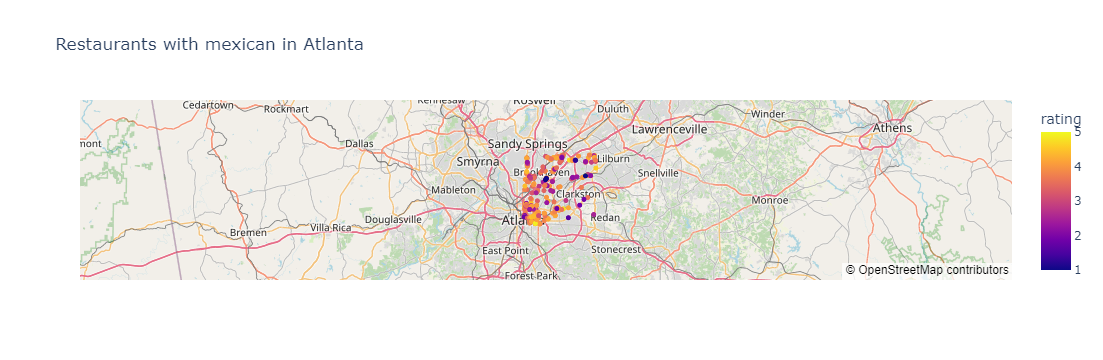

In [78]:
## make our final map and save as varaible
## make our final map and save as varaible
pfig = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = 'open-street-map', hover_name = 'name',
                         hover_data = ['price', 'rating', 'address', 'pickup', 
                                      'delivery'],
                         color = 'rating',
                         title = 'Restaurants with mexican in Atlanta')

pfig.show()